In [1]:
#import the various libaries 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image # python imaging library

#import tensorflow as tf 
from sklearn.model_selection import train_test_split,KFold

In [2]:
#load train data and test data directories
train_data ='eye_gender_data/train/'
test_data = 'eye_gender_data/test/'

#getting the pixel value distribution 
train_pixel_values = [Image.open(train_data + f'Image_{i}.jpg').size[0] for i in range(1, 9221)]
test_pixel_values = [Image.open(test_data + f'Image_{i}.jpg').size[0] for i in range(1, 2306)]

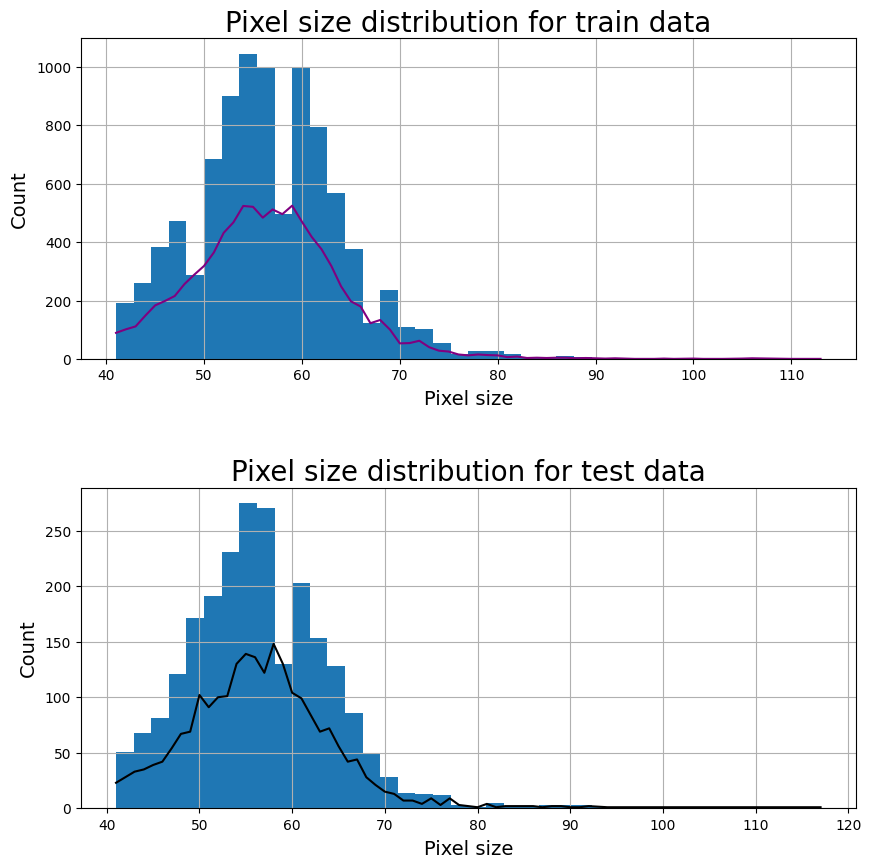

In [3]:
#observe the pixel values in subplot see the distribution 

fig, ax = plt.subplots(figsize=(10, 10), nrows=2, ncols=1)#two subplots are created by specifying the "nrows" and "ncols" 

plt.subplots_adjust(hspace=0.4)# add some vertical space between the two subplots

# find the unique values and their counts in the "train_pixel_values" and "test_pixel_values" arrays.
train_unique, train_counts = np.unique(train_pixel_values, return_counts=True)
test_unique, test_counts = np.unique(test_pixel_values, return_counts=True)

#ploting the first subplot
ax[0].hist(train_pixel_values, bins=40)
ax[0].plot(train_unique, train_counts, color='purple')
ax[0].set_title('Pixel size distribution for train data', pad=5, fontsize=20)
ax[0].set_xlabel('Pixel size', labelpad=5, fontsize=14)
ax[0].set_ylabel('Count', labelpad=5, fontsize=14)
ax[0].grid(axis='both')

#ploting the second subplot
ax[1].hist(test_pixel_values, bins=40)
ax[1].plot(test_unique, test_counts, color='black')
ax[1].set_title('Pixel size distribution for test data', pad=5, fontsize=20)
ax[1].set_xlabel('Pixel size', labelpad=5, fontsize=14)
ax[1].set_ylabel('Count', labelpad=5, fontsize=14)
ax[1].grid(axis='both')

plt.show()

In [4]:
#mean values of the pixels 
print('train_pixel_values: ', round(np.mean(np.array(train_pixel_values))))
print('test_pixel_values : ', round(np.mean(np.array(test_pixel_values))))                                  

train_pixel_values:  57
test_pixel_values :  57


In [5]:
#resize the images 
height = 57
width = 57

train_dataset = np.asarray(Image.open(train_data + 'Image_1.jpg').resize((height, width)))
train_dataset = train_dataset.reshape((1, height, width, 3))

test_dataset = np.asarray(Image.open(test_data + 'Image_1.jpg').resize((height, width)))
test_dataset = test_dataset.reshape((1, height, width, 3))

for i in range(2, 9221):
    img = np.asarray(Image.open(train_data + f'Image_{i}.jpg').resize((height, width)))
    train_dataset = np.append(train_dataset, img.reshape((1, height, width, 3)), axis=0)

In [6]:
for i in range(2,2306):
    img = np.asarray(Image.open(test_data + f'Image_{i}.jpg').resize((height, width)))
    test_dataset = np.append(test_dataset ,img.reshape((1,height,width,3)),axis=0)

In [8]:
# lets sort the label to use numerical sorting 
#read the training.csv
train_labels_csv = pd.read_csv('eye_gender_data/Training_set.csv')['label']

#convert the labels male = 0 and female = 1
train_labels = train_labels_csv.apply(lambda x: 0 if x=='male' else 1).values

In [10]:
#observe the convertion occured
#train_labels.head()

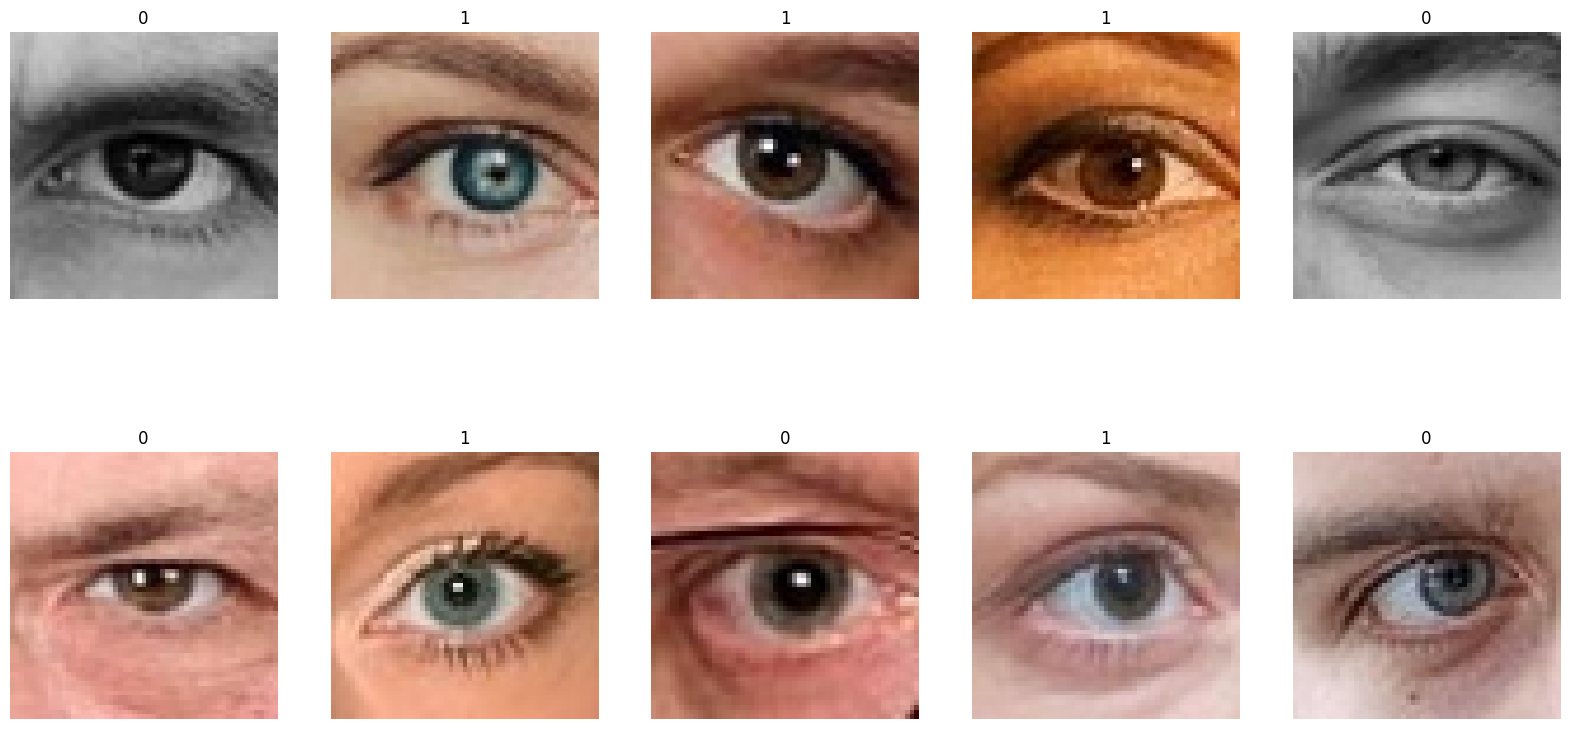

In [11]:
#view a few images 
plt.figure(figsize=(20,10))

for i in range (10):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(train_dataset[i].astype('uint8'))
    plt.title(train_labels[i])
    plt.axis('off')

In [12]:
#performing  data_augmentation on the train dataset
import tensorflow as tf 
from tensorflow.keras import layers 
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal'),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

Metal device set to: Apple M2


2023-01-19 19:03:32.635289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-01-19 19:03:32.635537: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2023-01-19 19:03:35.463020: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-01-19 19:03:35.469981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:35.902316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:36.396308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:36.788667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:37.180729: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:37.569165: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:37.960805: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:38.355658: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2023-01-19 19:03:38.745492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


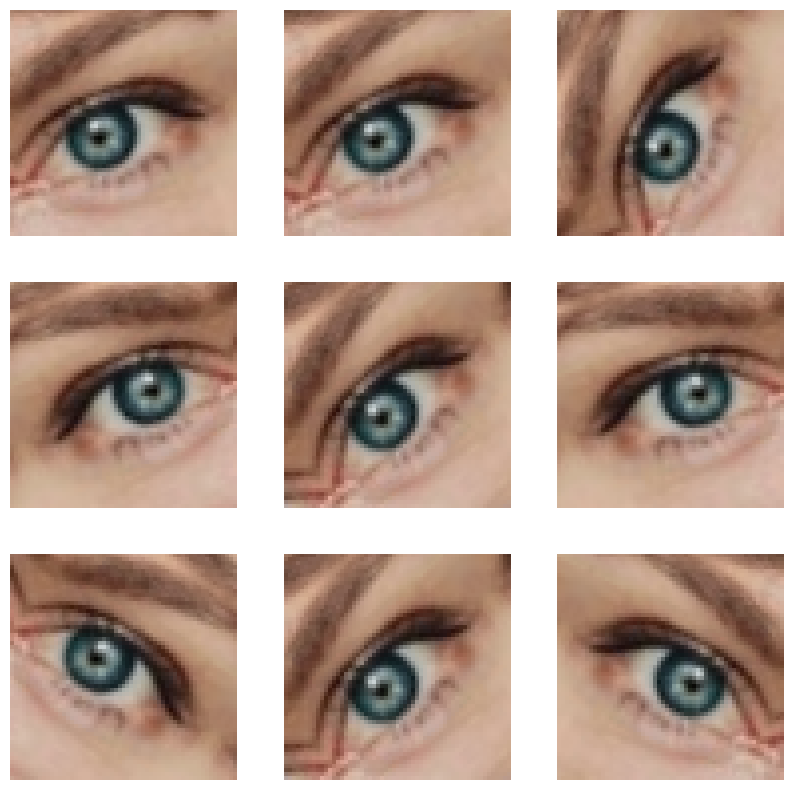

In [13]:
#observing if the images have been augumented using one of the images we will acess an image through indexing
plt.figure(figsize=(10,10))
second_image = train_dataset[1]
for i in range (9):
    ax = plt.subplot(3,3,i+1)
    augumented_image = data_augmentation(tf.expand_dims(second_image,0))
    plt.imshow(augumented_image[0]/255)
    plt.axis('off')

In [14]:
#augment the training dataset
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=60,
                                                                  horizontal_flip=True,
                                                                  rescale=1./255,
                                                                  validation_split=0.2)
#fit in the training dataset 
image_generator.fit(train_dataset)

In [15]:
#use kfold we split the dataset into 5 
kfold = KFold(n_splits=5, shuffle=False)

#lists to store train and validate datasets
kfold_train = []
kfold_validate = []

#create a for loop to iterate k times and each time the data is split into trianing and validation set
for train, validate in kfold.split(train_dataset,train_labels):
    kfold_train.append(train)
    kfold_validate.append(validate)

In [34]:
# create a function that to be called to carry out prediction and dowload the test data that prediction will be done on
def predict(test_dataset,filename):
    #method to make predictions on the test_dataset after normalizing it by dividing it by 255.
    predict_test = model.predict(test_dataset/255)
    
    # predicted values are reshaped into a 1-D array
    predict_test_reshape = predict_test.reshape((2305))
    
    #map the predicted values to binary values, with values less than 0.5 being mapped to 0 and values greater than 0.5 being mapped to 1.
    predict_test_where = np.where(predict_test_reshape < 0.5,0,1)
    #creating a new dataframe with reshape and mapping it with predictions in the label column
    predict_test_df = pd.DataFrame({'label':predict_test_where},index = list(range(len(predict_test_reshape))))
    #convert the male and female to numerical values as we did earlier with the training data 
    predict_test_df['label']=  predict_test_df['label'].apply(lambda x: 'male' if x==0 else 'female')

    #save the predict_test_df to csv
    predict_test_df.to_csv(filename,index=False)

In [58]:
#create a function that will plot the training history 
def plot(training_history):
    #assiging accuracy and loss variables
    accuracy =training_history.training_history['accuracy']
    val_accuracy = training_history.training_history['val_accuracy']
    
    loss = history.training_history['loss']
    val_loss = training_history.training_history['val_loss']
    
    #plot for accuracy 
    plt.figure(figsize=(10,10))
    plt.subplot(2,1,1)
    plt.plot(accuracy,label ='Training Accuracy')
    plt.plot(val_accuracy,label = 'Validation Accuracy')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training Accuracy and Validation Accuracy')
    
    #plot for loss
    plt.subplot(2,1,1)
    plt.plot(loss,label ='Training loss')
    plt.plot(val_loss,label = 'Validation loss')
    plt.ylabel('Cross Entropy-loss funtion')
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training Loss and Validation Loss')
    plt.xlabel('epoch')
    plt.show()
    

The folds are 5 hence the model will be trained 5 times using 5 folds of each of the split datasets(kfold_train,k_validate), after the model is trained on each fold the model is saved and then brought again and used for training in the next data fold.

After each fold the model is tested on the test dataset 

In [18]:
#building a model 
model = tf.keras.models.Sequential([
    layers.InputLayer(input_shape=(57,57,3)),
    
    layers.Conv2D(128,(2,2), activation ='relu'),
    layers.Conv2D(128,(2,2), activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(64,(2,2), activation ='relu'),
    layers.Conv2D(64,(2,2), activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(32,(2,2), activation ='relu'),
    layers.Conv2D(32,(2,2), activation ='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    
    layers.Conv2D(16,(2,2), activation ='relu'),
    layers.Conv2D(16,(2,2), activation ='relu'),
    layers.Conv2D(16,(2,2), activation ='relu'),
    layers.BatchNormalization(),
    
    layers.Flatten(),
    layers.Dense(10, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(5, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [19]:
#compile the model
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics =['accuracy'])

#early stop call back to prevent overfitting
early_stop_callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3, mode='min')

#model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       65664     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)       

In [23]:
#finally we can do training 
fold = 0

#store the training of the model in training_history
training_history = model.fit(image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='training'),
                             initial_epoch =0,
                             epochs=40,
                             batch_size = 32,
                             validation_data = image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='validation'),
                             #callbacks=[early_stop_callbacks]
                            )

Epoch 1/40
185/185 [==============================] - 26s 138ms/step - loss: 0.2772 - accuracy: 0.8844 - val_loss: 0.3628 - val_accuracy: 0.8325
Epoch 2/40
185/185 [==============================] - 28s 151ms/step - loss: 0.2737 - accuracy: 0.8821 - val_loss: 0.4632 - val_accuracy: 0.8068
Epoch 3/40
185/185 [==============================] - 28s 151ms/step - loss: 0.2658 - accuracy: 0.8885 - val_loss: 0.3106 - val_accuracy: 0.8685
Epoch 4/40
185/185 [==============================] - 25s 134ms/step - loss: 0.2598 - accuracy: 0.8948 - val_loss: 0.3771 - val_accuracy: 0.8400
Epoch 5/40
185/185 [==============================] - 25s 137ms/step - loss: 0.2633 - accuracy: 0.8898 - val_loss: 0.3059 - val_accuracy: 0.8705
Epoch 6/40
185/185 [==============================] - 25s 135ms/step - loss: 0.2532 - accuracy: 0.8954 - val_loss: 0.3324 - val_accuracy: 0.8488
Epoch 7/40
185/185 [==============================] - 25s 136ms/step - loss: 0.2477 - accuracy: 0.8946 - val_loss: 0.2372 - val_ac

In [24]:
#save the model
model.save('Kfold_model_fold1.h5')

In [35]:
filename='sample_submission.csv'
predict(test_dataset, filename)

73/73 [==============================] - 1s 17ms/step


In [26]:
model=tf.keras.models.load_model('Kfold_model_fold1.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       65664     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)       

In [27]:
#train the next fold 2
fold = 1
#store the training of the model in training_history
training_history = model.fit(image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='training'),
                             initial_epoch =40,
                             epochs=80,
                             batch_size = 32,
                             validation_data = image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='validation'),
                             #callbacks=[early_stop_callbacks]
                            )

Epoch 41/80


2023-01-19 19:57:48.295808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - ETA: 0s - loss: 0.1700 - accuracy: 0.9309

2023-01-19 19:58:15.277579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - 30s 160ms/step - loss: 0.1700 - accuracy: 0.9309 - val_loss: 0.2092 - val_accuracy: 0.9180
Epoch 42/80
185/185 [==============================] - 29s 156ms/step - loss: 0.1693 - accuracy: 0.9346 - val_loss: 0.2747 - val_accuracy: 0.8949
Epoch 43/80
185/185 [==============================] - 30s 161ms/step - loss: 0.1639 - accuracy: 0.9348 - val_loss: 0.2074 - val_accuracy: 0.9180
Epoch 44/80
185/185 [==============================] - 37s 199ms/step - loss: 0.1606 - accuracy: 0.9376 - val_loss: 0.2568 - val_accuracy: 0.8956
Epoch 45/80
185/185 [==============================] - 31s 166ms/step - loss: 0.1604 - accuracy: 0.9388 - val_loss: 0.2873 - val_accuracy: 0.8841
Epoch 46/80
185/185 [==============================] - 32s 173ms/step - loss: 0.1533 - accuracy: 0.9393 - val_loss: 0.2534 - val_accuracy: 0.9024
Epoch 47/80
185/185 [==============================] - 31s 167ms/step - loss: 0.1583 - accuracy: 0.9383 - val_loss: 0.2311 - val_accurac

In [ ]:
#save the model
model.save('Kfold_model_fold2.h5')

In [36]:
filename='sample_submission.csv'
predict(test_dataset, filename)

73/73 [==============================] - 1s 17ms/step


In [30]:
model=tf.keras.models.load_model('Kfold_model_fold2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       65664     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)       

In [37]:
#train the next fold 3
fold = 2
#store the training of the model in training_history
training_history = model.fit(image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='training'),
                             initial_epoch =80,
                             epochs=120,
                             batch_size = 32,
                             validation_data = image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='validation'),
                             #callbacks=[early_stop_callbacks]
                            )

Epoch 81/120
185/185 [==============================] - 26s 142ms/step - loss: 0.1364 - accuracy: 0.9478 - val_loss: 0.2080 - val_accuracy: 0.9275
Epoch 82/120
185/185 [==============================] - 30s 160ms/step - loss: 0.1314 - accuracy: 0.9498 - val_loss: 0.2044 - val_accuracy: 0.9207
Epoch 83/120
185/185 [==============================] - 29s 155ms/step - loss: 0.1280 - accuracy: 0.9531 - val_loss: 0.2325 - val_accuracy: 0.9173
Epoch 84/120
185/185 [==============================] - 29s 156ms/step - loss: 0.1279 - accuracy: 0.9493 - val_loss: 0.2712 - val_accuracy: 0.9044
Epoch 85/120
185/185 [==============================] - 28s 153ms/step - loss: 0.1256 - accuracy: 0.9510 - val_loss: 0.2585 - val_accuracy: 0.9051
Epoch 86/120
185/185 [==============================] - 31s 165ms/step - loss: 0.1368 - accuracy: 0.9449 - val_loss: 0.2307 - val_accuracy: 0.9193
Epoch 87/120
185/185 [==============================] - 30s 163ms/step - loss: 0.1314 - accuracy: 0.9487 - val_loss: 0

In [38]:
#save the model
model.save('Kfold_model_fold3.h5')

In [39]:
filename='sample_submission.csv'
predict(test_dataset, filename)

73/73 [==============================] - 2s 30ms/step


In [40]:
model = tf.keras.models.load_model('Kfold_model_fold3.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       65664     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)       

In [42]:
#train the next fold 4
fold = 3
#store the training of the model in training_history
training_history = model.fit(image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='training'),
                             initial_epoch =120,
                             epochs=160,
                             batch_size = 32,
                             validation_data = image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='validation'),
                             #callbacks=[early_stop_callbacks]
                            )

Epoch 121/160
185/185 [==============================] - 30s 161ms/step - loss: 0.1030 - accuracy: 0.9602 - val_loss: 0.2240 - val_accuracy: 0.9254
Epoch 122/160
185/185 [==============================] - 33s 178ms/step - loss: 0.1017 - accuracy: 0.9612 - val_loss: 0.2057 - val_accuracy: 0.9268
Epoch 123/160
185/185 [==============================] - 32s 174ms/step - loss: 0.1127 - accuracy: 0.9532 - val_loss: 0.1816 - val_accuracy: 0.9349
Epoch 124/160
185/185 [==============================] - 33s 178ms/step - loss: 0.1021 - accuracy: 0.9603 - val_loss: 0.3875 - val_accuracy: 0.8753
Epoch 125/160
185/185 [==============================] - 33s 180ms/step - loss: 0.1029 - accuracy: 0.9573 - val_loss: 0.1715 - val_accuracy: 0.9410
Epoch 126/160
185/185 [==============================] - 33s 177ms/step - loss: 0.0979 - accuracy: 0.9598 - val_loss: 0.2220 - val_accuracy: 0.9275
Epoch 127/160
185/185 [==============================] - 35s 191ms/step - loss: 0.1010 - accuracy: 0.9612 - val_

In [43]:
#save the model
model.save('Kfold_model_fold4.h5')

In [44]:
#carring out prediction
filename='sample_submission.csv'
predict(test_dataset, filename)

2023-01-19 21:25:27.610792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


73/73 [==============================] - 3s 43ms/step


In [45]:
model = tf.keras.models.load_model('Kfold_model_fold4.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 128)       1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 55, 55, 128)       65664     
                                                                 
 batch_normalization (BatchN  (None, 55, 55, 128)      512       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        32832     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 64)       

In [46]:
#train the next fold 5
fold = 4
#store the training of the model in training_history
training_history = model.fit(image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='training'),
                             initial_epoch =160,
                             epochs=200,
                             batch_size = 32,
                             validation_data = image_generator.flow(train_dataset[kfold_train[fold]],
                                                  train_labels[kfold_train[fold]],
                                                  batch_size = 32, shuffle=True,
                                                  subset='validation'),
                             #callbacks=[early_stop_callbacks]
                            )

Epoch 161/200


2023-01-19 21:25:31.653564: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - ETA: 0s - loss: 0.1071 - accuracy: 0.9592

2023-01-19 21:26:00.354773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


185/185 [==============================] - 32s 166ms/step - loss: 0.1071 - accuracy: 0.9592 - val_loss: 0.2175 - val_accuracy: 0.9234
Epoch 162/200
185/185 [==============================] - 30s 162ms/step - loss: 0.0983 - accuracy: 0.9595 - val_loss: 0.1726 - val_accuracy: 0.9383
Epoch 163/200
185/185 [==============================] - 31s 169ms/step - loss: 0.0899 - accuracy: 0.9676 - val_loss: 0.2064 - val_accuracy: 0.9322
Epoch 164/200
185/185 [==============================] - 31s 168ms/step - loss: 0.0975 - accuracy: 0.9636 - val_loss: 0.2154 - val_accuracy: 0.9193
Epoch 165/200
185/185 [==============================] - 31s 165ms/step - loss: 0.0893 - accuracy: 0.9651 - val_loss: 0.1884 - val_accuracy: 0.9342
Epoch 166/200
185/185 [==============================] - 29s 158ms/step - loss: 0.0898 - accuracy: 0.9646 - val_loss: 0.3183 - val_accuracy: 0.9017
Epoch 167/200
185/185 [==============================] - 28s 154ms/step - loss: 0.0971 - accuracy: 0.9622 - val_loss: 0.1592 -

In [47]:
#save the model
model.save('Kfold_model_fold5.h5')

In [61]:
filename='sample_submission.csv'
predict(test_dataset, filename)

73/73 [==============================] - 3s 47ms/step


In [60]:
#ploting the training and validation 
#plot(training_history)